In [ ]:
text = "평생 살 것처럼 꿈을 꾸어라. 그리고 내일 죽을 것처럼 오늘을 살아라"

tokens = [x for x in text.split(' ')]
print(tokens, '\n')

unique = set(tokens)
unique = list(unique)
print(unique)

token2idx = {}

for i in range(len(unique)):
  token2idx[unique[i]] = i

print(token2idx, '\n')

encode = [token2idx[x] for x in tokens]
encode

['평생', '살', '것처럼', '꿈을', '꾸어라.', '그리고', '내일', '죽을', '것처럼', '오늘을', '살아라'] 

['꾸어라.', '꿈을', '죽을', '그리고', '평생', '내일', '살', '오늘을', '살아라', '것처럼']


[과제] 상기 작업을 keras를 이용하여 수행하세요.

imdb 데이터 셋을 가져와서 다음 사항을 기준으로 감정분석을 수행하세요.

- num_words = 1000, max_len=100

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

num_words = 100
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
for i in range(10):
  if y_train[i] == 0:
    label = '부정'
  else:
    label = '긍정'
  print(f'{x_train[i]}\n{label}')

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 2, 36, 2, 5, 25, 2, 43, 2, 2, 50, 2, 2, 9, 35, 2, 2, 5, 2, 4, 2, 2, 2, 2, 2, 2, 39, 4, 2, 2, 2, 17, 2, 38, 13, 2, 4, 2, 50, 16, 6, 2, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 2, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 2, 12, 16, 38, 2, 5, 25, 2, 51, 36, 2, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 2, 2, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 2, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 2, 6, 2, 2, 18, 4, 2, 22, 21, 2, 2, 26, 2, 5, 2, 30, 2, 18, 51, 36, 28, 2, 92, 25, 2, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 2, 2, 32, 15, 16, 2, 19, 2, 32]
긍정
[1, 2, 2, 2, 2, 78, 2, 5, 6, 2, 2, 2, 2, 26, 4, 2, 8, 2, 2, 14, 2, 20, 13, 2, 2, 2, 2, 5, 2, 2, 2, 21, 14, 69, 2, 8, 30, 23, 7, 4, 2, 2, 93, 4, 2, 9, 2, 2, 5, 2, 4, 2, 9, 35, 2, 4, 2, 9, 2, 2, 4, 2, 9, 4, 2, 2, 19, 4, 2, 5, 89, 29, 2, 46, 37, 4, 2,

In [3]:
# pad_sequence() : 데이터의 maxlen 보다 길면 데이터를 자름
from tensorflow.keras.preprocessing.sequence import pad_sequences 
max_len = 100

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre') # 앞에서부터 패딩을 채움
pad_x_test = pad_sequences(x_test,maxlen=max_len, padding='pre')

In [4]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim = 32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           3200      
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1)                 3201      
                                                                 
Total params: 6,401
Trainable params: 6,401
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(pad_x_train,y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 3s 3ms/step - loss: 0.6526 - accuracy: 0.6176 - val_loss: 0.5971 - val_accuracy: 0.6804
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5717 - accuracy: 0.6986 - val_loss: 0.5751 - val_accuracy: 0.6998
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5557 - accuracy: 0.7111 - val_loss: 0.5761 - val_accuracy: 0.6946
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5436 - accuracy: 0.7206 - val_loss: 0.5795 - val_accuracy: 0.6934
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.7331 - val_loss: 0.5836 - val_accuracy: 0.6876
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5176 - accuracy: 0.7416 - val_loss: 0.5946 - val_accuracy: 0.6822
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5059 - accuracy: 0.7494 - val_loss: 0.6012 - val_accuracy: 0.6798
Epoch 

# 시각화



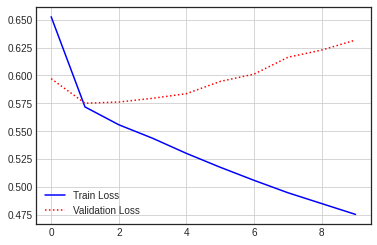

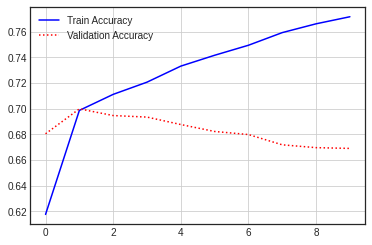

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
hist_dict = history.history
plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['accuracy'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_accuracy'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()


[과제] imdb 데이터 셋을 가져와서 다음 사항을 기준으로 감정분석을 수행하세요.
- num_words = 2000, max_len=400

In [8]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

num_words = 2000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=num_words)

In [9]:
# pad_sequence() : 데이터의 maxlen 보다 길면 데이터를 자름
from tensorflow.keras.preprocessing.sequence import pad_sequences 
max_len = 400

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre') # 앞에서부터 패딩을 채움
pad_x_test = pad_sequences(x_test,maxlen=max_len, padding='pre')

In [10]:
model = Sequential()

model.add(Embedding(input_dim=num_words, output_dim = 32,
                    input_length=max_len))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           64000     
                                                                 
 flatten_1 (Flatten)         (None, 12800)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 12801     
                                                                 
Total params: 76,801
Trainable params: 76,801
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(pad_x_train,y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 4s 5ms/step - loss: 0.4981 - accuracy: 0.7541 - val_loss: 0.3327 - val_accuracy: 0.8642
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2795 - accuracy: 0.8862 - val_loss: 0.3006 - val_accuracy: 0.8778
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2260 - accuracy: 0.9103 - val_loss: 0.3256 - val_accuracy: 0.8634
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1825 - accuracy: 0.9316 - val_loss: 0.3103 - val_accuracy: 0.8756
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1416 - accuracy: 0.9510 - val_loss: 0.3266 - val_accuracy: 0.8706
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1054 - accuracy: 0.9664 - val_loss: 0.3499 - val_accuracy: 0.8704
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.0760 - accuracy: 0.9786 - val_loss: 0.3903 - val_accuracy: 0.8616
Epoch 

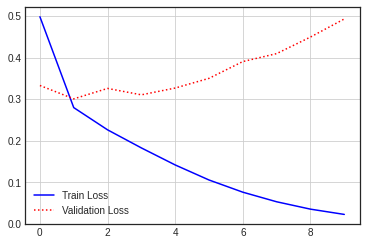

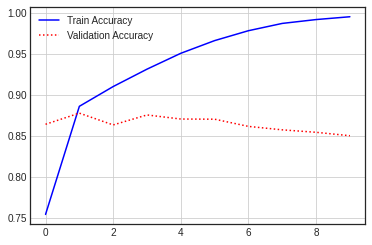

In [13]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
hist_dict = history.history
plt.plot(hist_dict['loss'], 'b-', label='Train Loss')
plt.plot(hist_dict['val_loss'], 'r:', label='Validation Loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(hist_dict['accuracy'], 'b-', label='Train Accuracy')
plt.plot(hist_dict['val_accuracy'], 'r:', label='Validation Accuracy')
plt.legend()
plt.grid()
